# Salary Prediction Based on Experience (in years)

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [15]:
data=pd.read_csv("E://Coursera_data_science_projects//Univariate_Linear_Regression//Salary_Prediction//salary_data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 608.0 bytes


## Plotting Scatter Plot

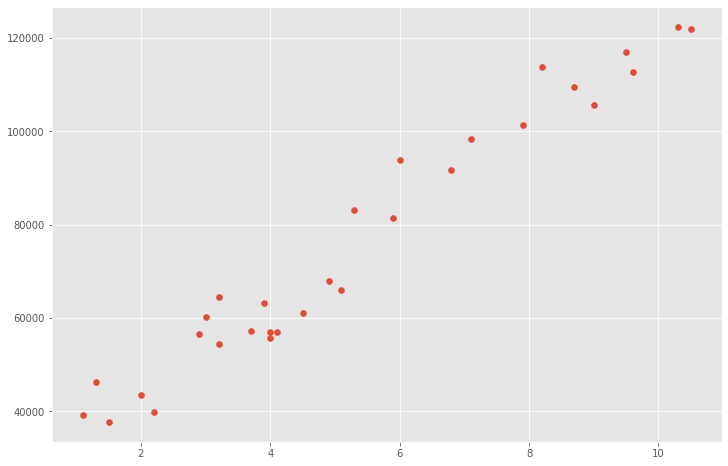

In [14]:
ax=plt.scatter(x='YearsExperience',y='Salary',data=data)

## Compute Cost Function $J(\theta)$

In [6]:
def cost_function(x,y,theta):
    m=len(y)
    y_pred=x.dot(theta)
    error=(y_pred-y)**2
    return 1/2*m*np.sum(error)

In [7]:
m=data['Salary'].values.size
x=np.append(np.ones((m,1)),data['YearsExperience'].values.reshape(m,1),axis=1)
y=data['Salary'].values.reshape(m,1)
theta=np.zeros((2,1))
cost_function(x,y,theta)

2926329871830.0

## Minimalizing Cost function ( Gradient Descent )

In [8]:
def gradient_descent(x,y,theta,alpha,iterations):
    m=len(y)
    costs=[]
    for i in range(iterations):
        y_pred=x.dot(theta)
        error=np.dot(x.transpose(),(y_pred-y))
        theta-=alpha*1/m*error
        costs.append(cost_function(x,y,theta))
    return theta,costs    

In [9]:
theta,costs=gradient_descent(x,y,theta,0.03,2000)
print("h(x) = {} + {}x1".format(str(round(theta[0, 0] , 2)),
                              str(round(theta[1, 0], 2))))

h(x) = 25792.13 + 9449.97x1


In [10]:
costs[len(costs)-1]

14071928275.51036

## Plotting the covergence

plotting the $J(\theta)$ against the iterations

Text(0.5, 1.0, 'values of the cost function over iterations of Gradient Descent')

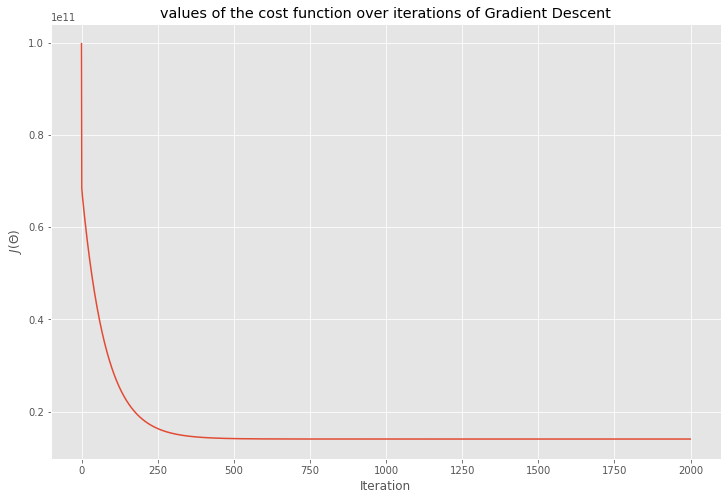

In [11]:
plt.plot(costs)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("values of the cost function over iterations of Gradient Descent")

## Training Data with Linear Regression Fit

In [13]:
theta.shape
theta

array([[25792.12966839],
       [ 9449.97278785]])

Text(0.5, 1.0, 'Linear Regression Fit')

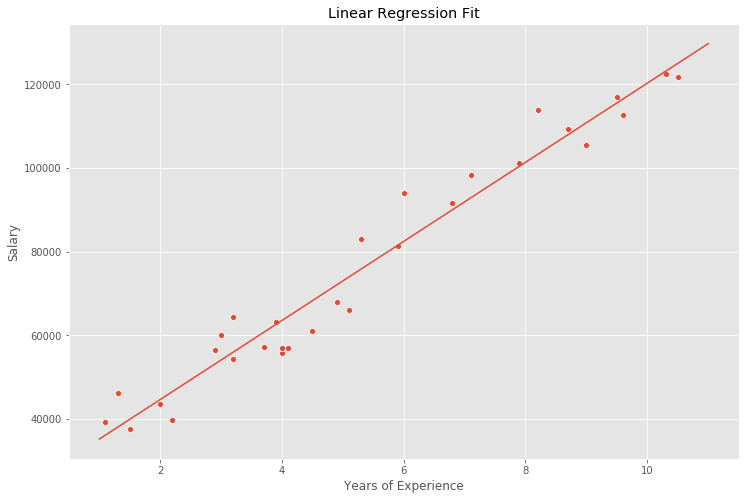

In [19]:
theta=np.squeeze(theta)
sns.scatterplot(x='YearsExperience',y='Salary',data=data)

x_value=[x for x in range(1,12)]
y_value=[(x*theta[1]+theta[0]) for x in x_value]

sns.lineplot(x_value,y_value)

plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression Fit")

In [24]:
theta[0],theta[1]

(25792.129668393747, 9449.972787852597)

In [21]:
y_value

[35242.10245624634,
 44692.075244098945,
 54142.04803195154,
 63592.02081980414,
 73041.99360765674,
 82491.96639550934,
 91941.93918336192,
 101391.91197121452,
 110841.88475906712,
 120291.85754691972,
 129741.83033477233]

## Inference using Optimised $\theta$ values

In [25]:
def predict(x,theta):
    y_pred=np.dot(theta.transpose(),x)
    return y_pred

In [26]:
y_pred_1=predict(np.array([1,5.2]),theta)
print("For 5.2 years of experience, model predicts a salary of $"+ str(round(y_pred_1,0)))

For 5.2 years of experience, model predicts a salary of $74932.0


In [27]:
y_pred_2=predict(np.array([1,11.5]),theta)
print("For 11.5 years of experience, model predicts a salary of $"+ str(round(y_pred_2,0)))

For 11.5 years of experience, model predicts a salary of $134467.0
